In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
%matplotlib inline

In [53]:
auto=pd.read_csv(r'C:\Users\User\Downloads\autos_dataset.csv')
auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [55]:
auto.drop(['fuel-type','make','aspiration','body-style','engine-location',
'drive-wheels','fuel-system'],axis = 1,inplace=True)

In [56]:
auto['num-of-cylinders'].replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12,
'two':2, 'eight':8},inplace= True)

In [57]:
auto['num-of-doors'].replace({'four':4,'two':2},inplace= True)

In [58]:
auto.replace('?',np.nan, inplace=True)

In [59]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   num-of-doors       203 non-null    float64
 3   wheel-base         205 non-null    float64
 4   length             205 non-null    float64
 5   width              205 non-null    float64
 6   height             205 non-null    float64
 7   curb-weight        205 non-null    int64  
 8   engine-type        205 non-null    object 
 9   num-of-cylinders   205 non-null    int64  
 10  engine-size        205 non-null    int64  
 11  bore               201 non-null    object 
 12  stroke             201 non-null    object 
 13  compression-ratio  205 non-null    float64
 14  horsepower         203 non-null    object 
 15  peak-rpm           203 non-null    object 
 16  city-mpg           205 non

In [62]:
auto['bore'] = auto['bore'].astype('float64')
auto['stroke'] = auto['stroke'].astype('float64')
auto['horsepower'] = auto['horsepower'].astype('float64')
auto['peak-rpm'] = auto['peak-rpm'].astype('float64')
auto['price'] = auto['price'].astype('float64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   num-of-doors       203 non-null    float64
 3   wheel-base         205 non-null    float64
 4   length             205 non-null    float64
 5   width              205 non-null    float64
 6   height             205 non-null    float64
 7   curb-weight        205 non-null    int64  
 8   engine-type        205 non-null    object 
 9   num-of-cylinders   205 non-null    int64  
 10  engine-size        205 non-null    int64  
 11  bore               201 non-null    float64
 12  stroke             201 non-null    float64
 13  compression-ratio  205 non-null    float64
 14  horsepower         203 non-null    float64
 15  peak-rpm           203 non-null    float64
 16  city-mpg           205 non

In [85]:
auto['price'] = auto['price'].fillna(auto['price'].median())
auto['bore'] = auto['bore'].fillna(auto['bore'].median())
auto['stroke'] = auto['stroke'].fillna(auto['stroke'].median())
auto['horsepower'] = auto['horsepower'].fillna(auto['horsepower'].median())
auto['peak-rpm'] = auto['peak-rpm'].fillna(auto['peak-rpm'].median())
auto['num-of-doors'] = auto['num-of-doors'].fillna(auto['num-of-doors'].median())

In [65]:
auto.corr()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,-0.664550,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.132563,-0.004928,-0.178515,0.071064,0.273851,-0.035823,0.034606,-0.080149
num-of-doors,-0.664550,1.000000,0.445696,0.393593,0.202072,0.547651,0.195683,-0.016530,0.017519,0.114737,-0.013107,0.165799,-0.123999,-0.241412,-0.020812,-0.044507,0.050556
wheel-base,-0.531954,0.445696,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.489556,0.159684,0.249786,0.352876,-0.361338,-0.470414,-0.544082,0.584847
length,-0.357612,0.393593,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.607016,0.128622,0.158414,0.553337,-0.286362,-0.670909,-0.704662,0.686567
width,-0.232919,0.202072,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559262,0.182708,0.181129,0.641337,-0.219374,-0.642704,-0.677218,0.724558
height,-0.541038,0.547651,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.173506,-0.058994,0.261214,-0.109286,-0.321113,-0.048640,-0.107358,0.140439
curb-weight,-0.227691,0.195683,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648848,0.168164,0.151362,0.750927,-0.266358,-0.757414,-0.797465,0.819817
num-of-cylinders,-0.113129,-0.016530,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.234576,0.003389,-0.020002,0.691832,-0.124883,-0.445837,-0.466666,0.681036
engine-size,-0.105790,0.017519,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.585636,0.200246,0.028971,0.810216,-0.244383,-0.653658,-0.677470,0.860343
bore,-0.132563,0.114737,0.489556,0.607016,0.559262,0.173506,0.648848,0.234576,0.585636,1.000000,-0.056054,0.005468,0.574258,-0.256600,-0.582627,-0.585352,0.532861


<AxesSubplot:>

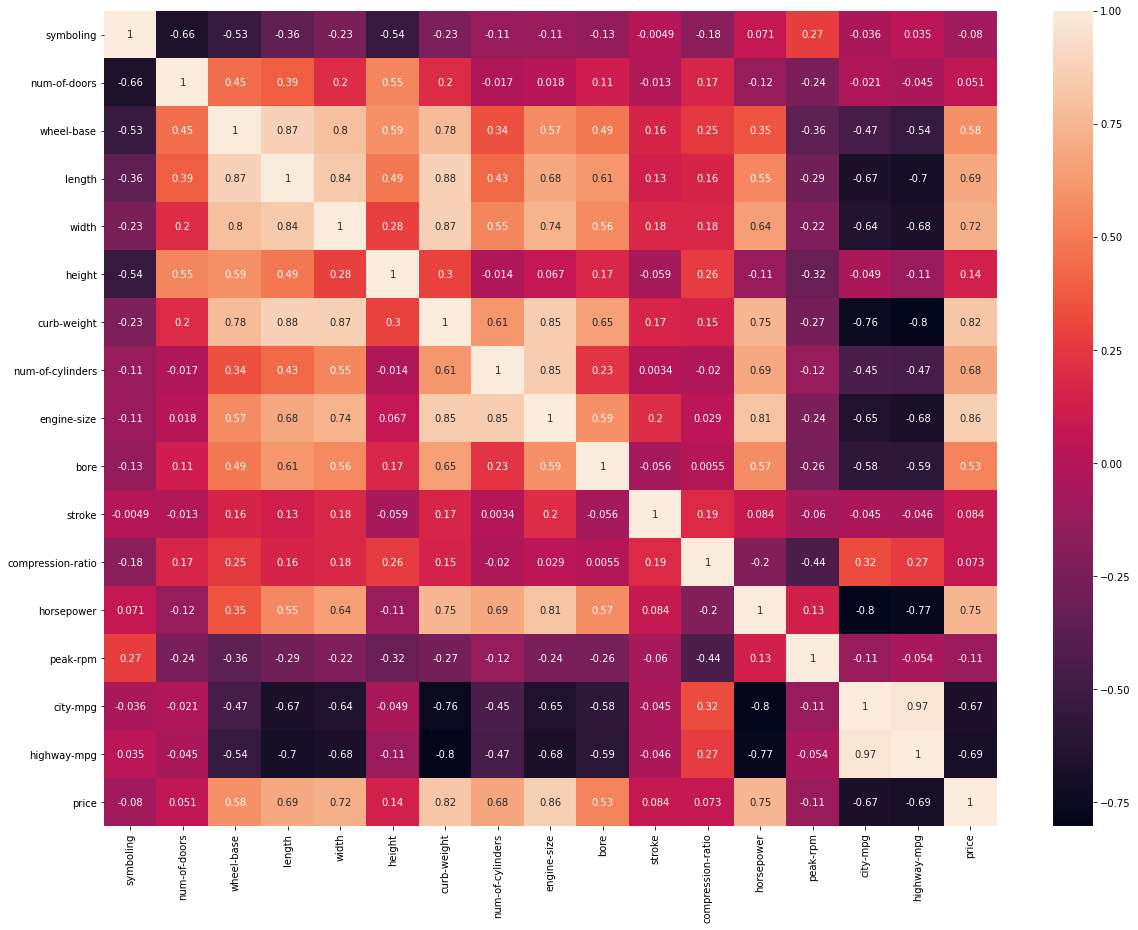

In [67]:
plt.figure(figsize=(20,15))
sns.heatmap(auto.corr(),annot= True)

In [83]:
#auto.drop('engine-type',axis=1,inplace=True)
auto.drop(['normalized-losses'],axis = 1,inplace = True)
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   num-of-doors       203 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    int64  
 7   num-of-cylinders   205 non-null    int64  
 8   engine-size        205 non-null    int64  
 9   bore               205 non-null    float64
 10  stroke             205 non-null    float64
 11  compression-ratio  205 non-null    float64
 12  horsepower         205 non-null    float64
 13  peak-rpm           205 non-null    float64
 14  city-mpg           205 non-null    int64  
 15  highway-mpg        205 non-null    int64  
 16  price              205 non

In [87]:
y = auto[['price']]
x = auto.drop(['price','symboling','num-of-doors','wheel-base','height','bore','stroke','compression-ratio',
               'peak-rpm'],axis = 1)

In [88]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [89]:
model = LinearRegression()

In [90]:
model.fit(x_train,y_train)

LinearRegression()

In [91]:
y_pred = model.predict(x_test)

In [92]:
y_test.head()

,price
78,6669.0
97,7999.0
151,6338.0
44,10295.0
40,10295.0


In [93]:
y_pred[0:5]

array([[6338.09357261],
       [6740.54569362],
       [6049.27037992],
       [4955.3225774 ],
       [9022.12519544]])

In [94]:
r2 = r2_score(y_test,y_pred)
r2 * 100

72.208352944985

In [95]:
mean_squared_error(y_test,y_pred)

15223848.134604733

In [96]:
m_values = model.coef_
m_values

array([[ -21.6658037 ,  380.88308768,    1.56040956, -724.50394221,
         136.62902977,    1.65989023,   33.60804372, -174.17228699]])

In [98]:
m_values = model.coef_
m_values
for i,col_name in enumerate(x_train.columns):
    print(f'Coeffcient of {col_name} is {round(m_values[0][i],2)}')

Coeffcient of length is -21.67
Coeffcient of width is 380.88
Coeffcient of curb-weight is 1.56
Coeffcient of num-of-cylinders is -724.5
Coeffcient of engine-size is 136.63
Coeffcient of horsepower is 1.66
Coeffcient of city-mpg is 33.61
Coeffcient of highway-mpg is -174.17


In [99]:
intercept = model.intercept_
print('Intercept is : ',intercept)

Intercept is :  [-22117.83705575]
